# Hulu Future Content Strategy

## Imports

In [ ]:
import pandas as pd 
import os 
import numpy as np
import matplotlib.pylab as plt
import sklearn

## Read CSV

In [ ]:
df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

In [ ]:
df.head(5)

,Column1,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87.0,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87.0,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84.0,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96.0,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97.0,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
df.shape

(16744, 17)

## Clean Data

##### Title

In [ ]:
df['Title'].isna().value_counts()

False    16744
Name: Title, dtype: int64

In [ ]:
df.drop_duplicates(subset = ["Title"], keep = False).head(2)

,Column1,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0


In [ ]:
df['Title'].isna().value_counts()

False    16744
Name: Title, dtype: int64

##### Year

In [ ]:
df['Year'].isna().value_counts()

False    16744
Name: Year, dtype: int64

##### Age

In [ ]:
df['Age'].isna().value_counts()

True     9390
False    7354
Name: Age, dtype: int64

In [ ]:
df['Age'].fillna("Missing", inplace = True )

In [ ]:
df['Age'].isna().value_counts()

False    16744
Name: Age, dtype: int64

##### IMDb

In [ ]:
df['IMDb'].isna().value_counts()

False    16173
True       571
Name: IMDb, dtype: int64

In [ ]:
df['IMDb'].mean()

5.902751499412594

In [ ]:
df['IMDb'].median() #Mean and Median are not the same. Data is skewed. This indicates we use the median to replace null values. 

6.1

In [ ]:
df['IMDb'].fillna(6.1, inplace = True )

In [ ]:
df['IMDb'].isna().value_counts()

False    16744
Name: IMDb, dtype: int64

##### Rotten Tomatoes 

In [ ]:
df['Rotten Tomatoes'].isna().value_counts()

True     11586
False     5158
Name: Rotten Tomatoes, dtype: int64

In [ ]:
df["Rotten Tomatoes"] = df["Rotten Tomatoes"].astype(str)

In [ ]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace('%', '')

In [ ]:
df["Rotten Tomatoes"] = df["Rotten Tomatoes"].astype(str).astype(float)
df["Rotten Tomatoes"].dtype

dtype('float64')

In [ ]:
df['Rotten Tomatoes'].mean()

65.42846064366033

In [ ]:
df['Rotten Tomatoes'].median() #Mean and Median are not the same. Data is skewed. This indicates we use the median to replace null values. 

71.0

In [ ]:
df['Rotten Tomatoes'].fillna(71, inplace = True )

In [ ]:
df['IMDb'].isna().value_counts()

False    16744
Name: IMDb, dtype: int64

In [ ]:
df = df.rename(columns = {'Rotten Tomatoes': 'RottenTomatoes'}, inplace = False)

##### Netflix 

In [ ]:
df['Netflix'].isna().value_counts()

False    16744
Name: Netflix, dtype: int64

##### Hulu

In [ ]:
df['Hulu'].isna().value_counts()

False    16744
Name: Hulu, dtype: int64

##### Prime Video 

In [ ]:
df['Prime Video'].isna().value_counts()

False    16744
Name: Prime Video, dtype: int64

##### Disney+

In [ ]:
df['Disney+'].isna().value_counts()

False    16744
Name: Disney+, dtype: int64

##### Type

In [ ]:
df['Type'].isna().value_counts()

False    16744
Name: Type, dtype: int64

In [ ]:
df['Type'].value_counts() # DF only includes Type 0. This doesn't help our analysis. We are removing the column.

0    16744
Name: Type, dtype: int64

In [ ]:
del df['Type']

##### Directors

In [ ]:
df['Directors'].isna().value_counts()

False    16018
True       726
Name: Directors, dtype: int64

In [ ]:
df['Directors'].fillna("Missing", inplace = True )

In [ ]:
df['Directors'].isna().value_counts()

False    16744
Name: Directors, dtype: int64

##### Genres

In [ ]:
df['Genres'].isna().value_counts()

False    16469
True       275
Name: Genres, dtype: int64

In [ ]:
df['Genres'].fillna("Missing", inplace = True )

In [ ]:
df['Genres'].isna().value_counts()

False    16744
Name: Genres, dtype: int64

##### Country

In [ ]:
df['Country'].isna().value_counts()

False    16309
True       435
Name: Country, dtype: int64

In [ ]:
df['Country'].fillna("Missing", inplace = True )

In [ ]:
df['Country'].isna().value_counts()

False    16744
Name: Country, dtype: int64

##### Language

In [ ]:
df['Language'].isna().value_counts()

False    16145
True       599
Name: Language, dtype: int64

In [ ]:
df['Language'].fillna("Missing", inplace = True )

In [ ]:
df['Language'].isna().value_counts()

False    16744
Name: Language, dtype: int64

##### Runtime 

In [ ]:
df['Runtime'].isna().value_counts()

False    16152
True       592
Name: Runtime, dtype: int64

In [ ]:
df['Runtime'].mean()

93.41344725111442

In [ ]:
df['Runtime'].median() #Mean and Median are not the same. Data is skewed. This indicates we use the median to replace null values. 

92.0

In [ ]:
df['Runtime'].fillna(92, inplace = True )

In [ ]:
df['Runtime'].isna().value_counts()

False    16744
Name: Runtime, dtype: int64

## Descriptive Statistics & Initial Visualizations

##### Year

In [ ]:
df[["Year"]].describe()

,Year
count,16744.000000
mean,2003.014035
std,20.674321
min,1902.000000
25%,2000.000000
50%,2012.000000
75%,2016.000000
max,2020.000000


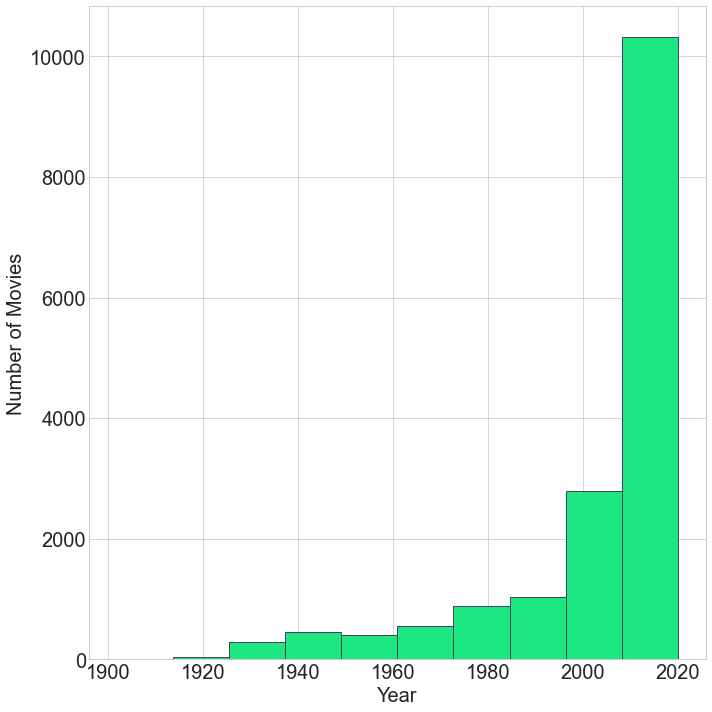

In [ ]:
plt.figure(figsize = (10,10))
plt.style.use('seaborn-whitegrid')
plt.hist(df.Year, color='#1ce783', edgecolor = '#445')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Movies', fontsize = 20)
plt.xticks(fontsize= 20 )
plt.yticks(fontsize= 20 )
plt.tight_layout()
plt.show()

##### Age

In [ ]:
df['Age'].value_counts()

Missing    9390
18+        3474
7+         1462
13+        1255
all         843
16+         320
Name: Age, dtype: int64

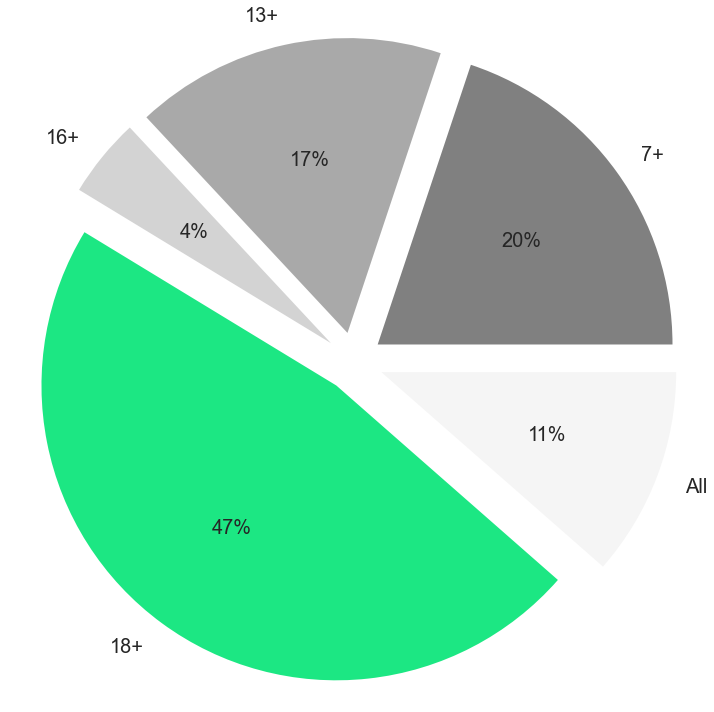

In [ ]:
plt.figure(figsize = (10,10))
Age = ['7+', '13+', '16+', '18+', 'All']
Count6 = [1462,1255,320,3474,843]

colors = ["gray", "darkgray", "lightgray", "#1ce783", "whitesmoke"]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(Count6, labels = Age, colors=colors, explode=explode, autopct = '%.0f%%', textprops={'fontsize': 20})
plt.style.use('seaborn-whitegrid')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### IMDb

In [ ]:
df[["IMDb"]].describe()

,IMDb
count,16744.000000
mean,5.909478
std,1.325168
min,0.000000
25%,5.100000
50%,6.100000
75%,6.900000
max,9.300000


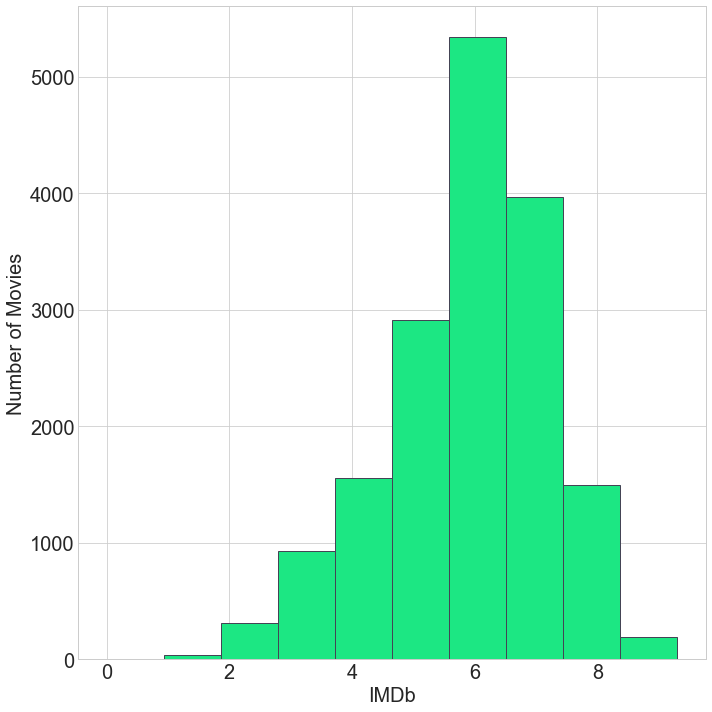

In [ ]:
plt.figure(figsize = (10,10))
plt.style.use('seaborn-whitegrid')
plt.hist(df.IMDb, color='#1ce783', edgecolor = '#445')
plt.xlabel('IMDb', fontsize = 20)
plt.ylabel('Number of Movies', fontsize = 20)
plt.xticks(fontsize= 20 )
plt.yticks(fontsize= 20 )
plt.tight_layout()
plt.show()

##### Rotten Tomatoes

In [ ]:
df[["RottenTomatoes"]].describe()

,RottenTomatoes
count,16744.000000
mean,69.283684
std,14.992993
min,2.000000
25%,71.000000
50%,71.000000
75%,71.000000
max,100.000000


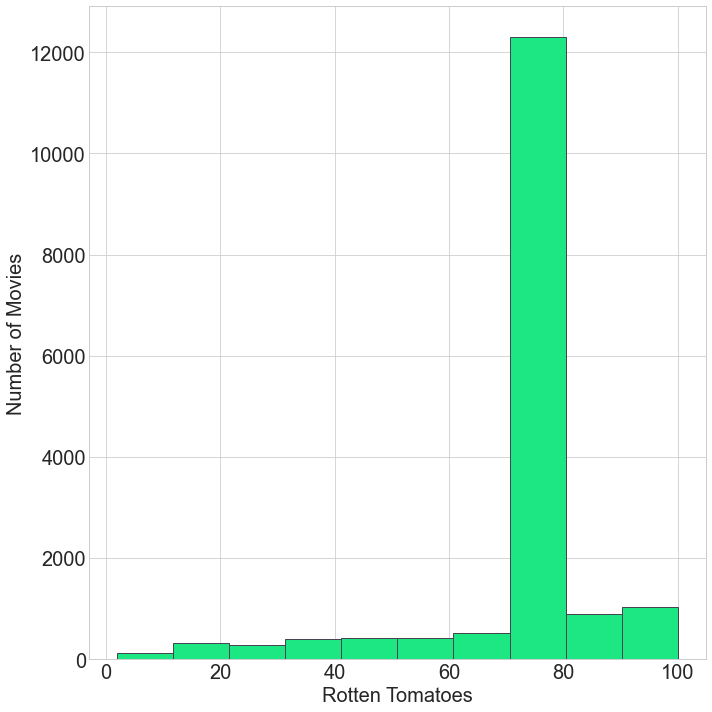

In [ ]:
plt.figure(figsize = (10,10))
plt.style.use('seaborn-whitegrid')
plt.hist(df.RottenTomatoes, color='#1ce783', edgecolor = '#445')
plt.xlabel('Rotten Tomatoes', fontsize = 20)
plt.ylabel('Number of Movies', fontsize = 20)
plt.xticks(fontsize= 20 )
plt.yticks(fontsize= 20 )
plt.tight_layout()
plt.show()

##### Netflix

In [ ]:
df['Netflix'].value_counts()

0    13184
1     3560
Name: Netflix, dtype: int64

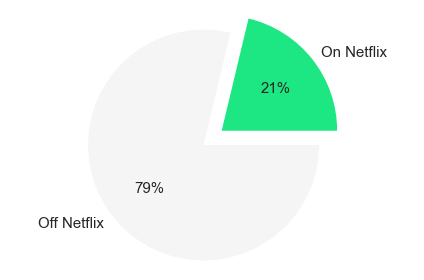

In [ ]:
Netflix = ['On Netflix', 'Off Netflix']
Count2 = [3560,13184]

colors = [ "#1ce783", "whitesmoke"]
explode = (0.1, 0.1)
plt.pie(Count2, labels = Netflix, colors=colors, explode=explode, autopct = '%.0f%%', textprops={'fontsize': 15})
plt.style.use('seaborn-whitegrid')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### Hulu

In [ ]:
df['Hulu'].value_counts()

0    15841
1      903
Name: Hulu, dtype: int64

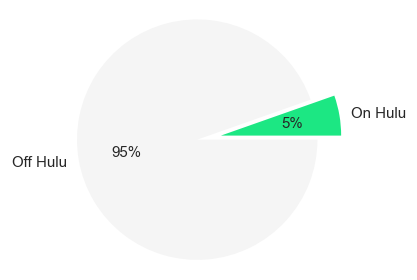

In [ ]:
Hulu = ['On Hulu', 'Off Hulu']
Count3 = [903,15841]

colors = [ "#1ce783", "whitesmoke"]
explode = (0.1, 0.1)
plt.pie(Count3, labels = Hulu, colors=colors, explode=explode, autopct = '%.0f%%', textprops={'fontsize': 15})
plt.style.use('seaborn-whitegrid')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### Prime Video

In [ ]:
df['Prime Video'].value_counts()

1    12354
0     4390
Name: Prime Video, dtype: int64

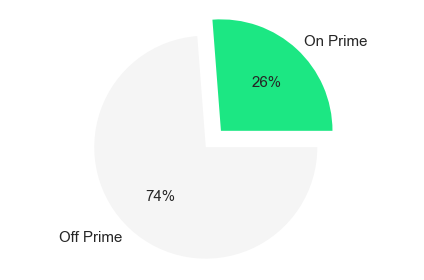

In [ ]:
Prime = ['On Prime', 'Off Prime']
Count4 = [4390,12354]

colors = [ "#1ce783", "whitesmoke"]
explode = (0.1, 0.1)
plt.pie(Count4, labels = Prime, colors=colors, explode=explode, autopct = '%.0f%%', textprops={'fontsize': 15})
plt.style.use('seaborn-whitegrid')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### Disney+

In [ ]:
df['Disney+'].value_counts()

0    16180
1      564
Name: Disney+, dtype: int64

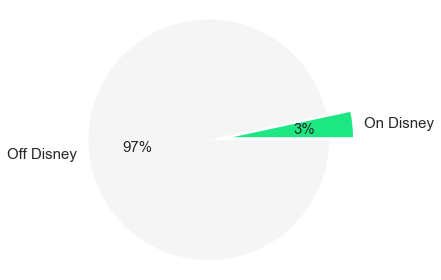

In [ ]:
Disney = ['On Disney', 'Off Disney']
Count5 = [564,16180]

colors = [ "#1ce783", "whitesmoke"]
explode = (0.1, 0.1)
plt.pie(Count5, labels = Disney, colors=colors, explode=explode, autopct = '%.0f%%', textprops={'fontsize': 15})
plt.style.use('seaborn-whitegrid')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### Directors

### This cell (and the following) were changed to markdown because it takes between 5-10 minutes to run. If you would like to see this specific code output- please change it to code(:

directors = df['Directors'].str.get_dummies(sep=',')

dictionary4 = {}
for column in directors:
    total = 0
    for item in directors[column]:
        if item == 1:
            total = total + 1
    dictionary4[column] = total


#sorting to find the top 20 languages
sorted_dict_value = sorted(dictionary4.items(), key = lambda sort_by:sort_by[1])
print(sorted_dict_value)

plt.figure(figsize = (10,10))
top_10_directors_freq = {'David DeCoteau': 21, 'Jan Suter': 21, 'Jay Karas': 21, 'Raúl Campos': 21, 'Sam Newfield': 22, 'Jim Wynorski': 23, 'William Beaudine': 23, 'Cheh Chang': 29, 'Joseph Kane': 31, 'Jay Chapman': 36}

directors_names = list(top_10_directors_freq.keys())
directors_counts = list(top_10_directors_freq.values())

plt.style.use('seaborn-whitegrid')
plt.barh(range(len(top_10_directors_freq)), directors_counts, tick_label = directors_names,color='#1ce783', edgecolor = '#445' )
plt.xlabel("Number of Movies Directed", fontsize = 20)
plt.ylabel("Directors", fontsize = 20)
plt.xticks(fontsize= 20 )
plt.yticks(fontsize= 20 )
plt.tight_layout()
plt.show()


##### Genres

In [ ]:
genres = df['Genres'].str.get_dummies(sep=',')

In [ ]:
total = 0
dictionary = {}
list1 = ['Action', 'Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror','Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
#genres list excludes "Missing" genre
for kind in list1:
    #print(kind)
    total = 0
    for movie in genres[kind]:
        #print(movie)
        if movie == 1:
            total = total + 1
    dictionary[kind] = total
print(dictionary)

{'Action': 2683, 'Adventure': 1778, 'Animation': 711, 'Biography': 821, 'Comedy': 4637, 'Crime': 1833, 'Documentary': 2546, 'Drama': 7227, 'Family': 1514, 'Fantasy': 1089, 'Film-Noir': 79, 'Game-Show': 7, 'History': 715, 'Horror': 2201, 'Music': 667, 'Musical': 401, 'Mystery': 1274, 'News': 105, 'Reality-TV': 22, 'Romance': 2359, 'Sci-Fi': 1228, 'Short': 386, 'Sport': 404, 'Talk-Show': 19, 'Thriller': 3354, 'War': 539, 'Western': 499}


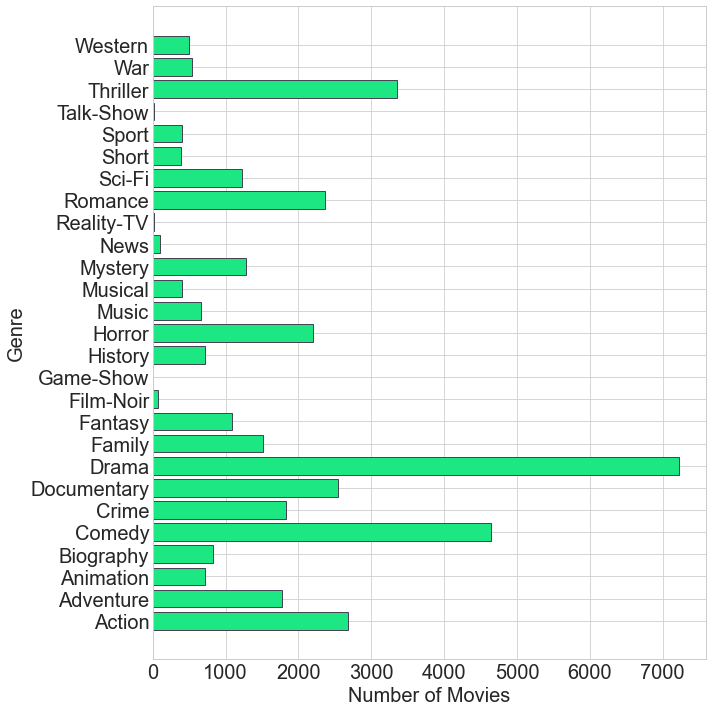

In [ ]:
plt.figure(figsize = (10,10))
genre_names = list(dictionary.keys())
genre_counts = list(dictionary.values())

plt.style.use('seaborn-whitegrid')
plt.barh(range(len(dictionary)), genre_counts, tick_label = genre_names,color='#1ce783', edgecolor = '#445' )
plt.xlabel("Number of Movies", fontsize = 20)
plt.ylabel("Genre", fontsize = 20)
plt.xticks(fontsize= 20 )
plt.yticks(fontsize= 20 )
plt.tight_layout()
plt.show()

##### Country

In [ ]:
country=df['Country'].str.get_dummies(sep=',')
country.head()
dictionary1={}
for column in country:
    total=0
    for item in country[column]:
        if item ==1:
            total=total+1
    dictionary1[column]=total
    
sort_value=sorted(dictionary1.items(), key=lambda x:x[1], reverse=True)
for i in sort_value:
    print(i[0],i[1])

United States 10486
United Kingdom 1713
India 1157
Canada 1117
France 741
Germany 498
Missing 435
Italy 417
Spain 329
Australia 321
Hong Kong 269
Japan 266
China 189
Mexico 183
South Korea 162
Belgium 151
Ireland 128
Sweden 118
Netherlands 116
Denmark 113
Argentina 106
Philippines 94
Turkey 88
South Africa 86
Taiwan 80
Israel 79
Switzerland 76
West Germany 69
Brazil 64
Thailand 64
Poland 63
Russia 62
New Zealand 60
Indonesia 56
Norway 56
Egypt 50
Austria 48
Czech Republic 44
United Arab Emirates 43
Romania 41
Finland 40
Colombia 35
Hungary 35
Greece 32
Bulgaria 29
Singapore 29
Luxembourg 27
Iceland 25
Nigeria 25
Pakistan 25
Chile 22
Peru 21
Portugal 21
Malaysia 20
Uruguay 17
Ukraine 16
Iran 15
Croatia 14
Soviet Union 14
Qatar 13
Yugoslavia 13
Guatemala 12
Kenya 12
Morocco 12
Cambodia 11
Serbia 11
Lebanon 10
Syria 10
Jordan 9
Lithuania 9
Bangladesh 8
Estonia 8
Monaco 8
Palestine 8
Slovakia 8
Slovenia 8
Bosnia and Herzegovina 7
Georgia 7
Latvia 7
Venezuela 7
Dominican Republic 6
Ghana 6


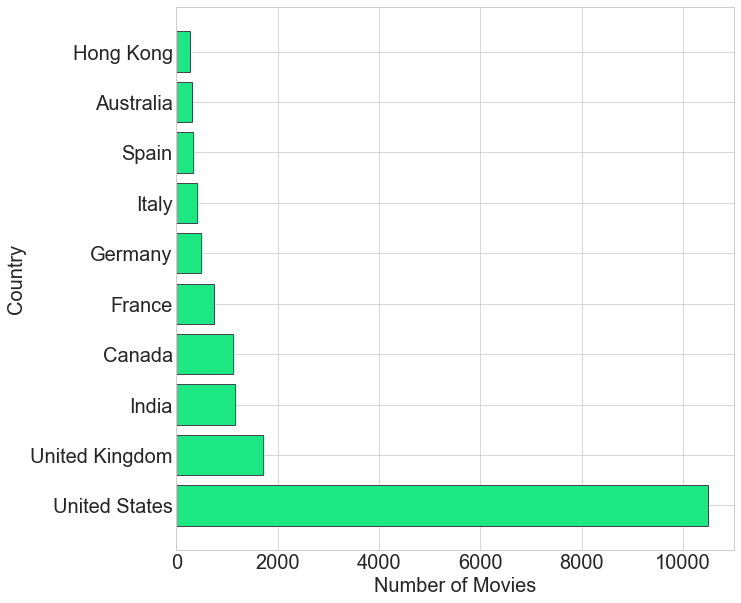

In [ ]:
plt.figure(figsize = (10,10))
data={'United States':10486, 'United Kingdom':1713, 'India':1157, 'Canada':1117, 'France':741, 'Germany':498, 'Italy':417, 'Spain':329,'Australia':321, 'Hong Kong':269}

plt.style.use('seaborn-whitegrid')
country_names = list(data.keys())
country_counts = list(data.values())
plt.barh(range(len(data)), country_counts, tick_label = country_names, color='#1ce783', edgecolor = '#445')
plt.xlabel("Number of Movies", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize= 20 )
plt.yticks(fontsize= 20 )
plt.show()

##### Language

In [ ]:
language = df['Language'].str.get_dummies(sep=',')

In [ ]:
#looping through
dictionary3 = {}
for column in language:
    total = 0
    for item in language[column]:
        if item == 1:
            total = total + 1
    dictionary3[column] = total

#deleting "Missing" from the dictionary
del dictionary3["Missing"]
print(dictionary3)

#sorting to find the top 20 languages
sorted_dict_value = sorted(dictionary3.items(), key = lambda sort_by:sort_by[1])

{' Ancient (to 1453)': 1, 'Aboriginal': 11, 'Acholi': 1, 'Afrikaans': 26, 'Akan': 3, 'Albanian': 7, 'Algonquin': 1, 'American Sign Language': 17, 'Amharic': 4, 'Apache languages': 3, 'Arabic': 190, 'Aragonese': 1, 'Aramaic': 3, 'Armenian': 7, 'Assamese': 3, 'Assyrian Neo-Aramaic': 2, 'Athapascan languages': 1, 'Australian Sign Language': 1, 'Awadhi': 4, 'Azerbaijani': 1, 'Basque': 11, 'Belarusian': 1, 'Bemba': 1, 'Bengali': 46, 'Berber languages': 1, 'Bhojpuri': 5, 'Bosnian': 12, 'Brazilian Sign Language': 5, 'British Sign Language': 1, 'Bulgarian': 11, 'Cantonese': 175, 'Catalan': 20, 'Chechen': 1, 'Cheyenne': 1, 'Chinese': 62, 'Cornish': 1, 'Creek': 1, 'Croatian': 17, 'Czech': 27, 'Danish': 60, 'Dari': 7, 'Dutch': 68, 'Dyula': 1, 'East-Greenlandic': 1, 'English': 13233, 'Esperanto': 4, 'Estonian': 4, 'Ewe': 1, 'Filipino': 72, 'Finnish': 24, 'Flemish': 6, 'French': 799, 'French Sign Language': 2, 'Fulah': 1, 'Gallegan': 3, 'Georgian': 8, 'German': 483, 'Greek': 33, 'Greenlandic': 1, '

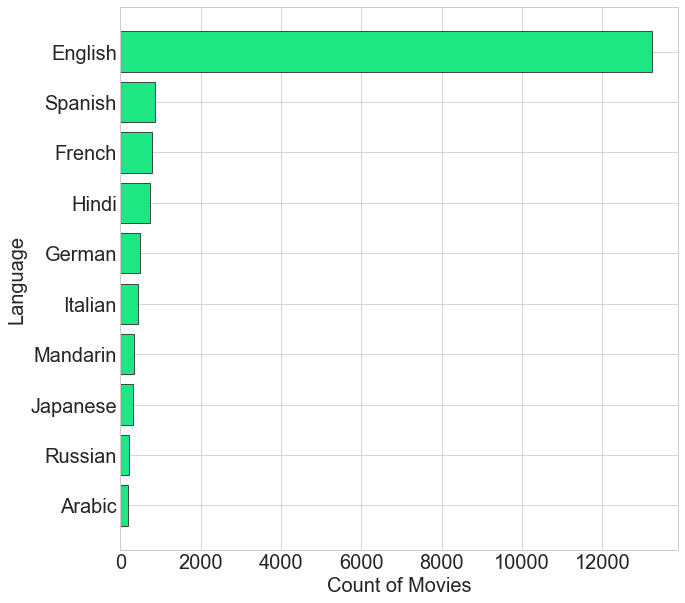

In [ ]:
top_10_languages = {'Arabic': 190, 'Russian': 222, 'Japanese': 317, 'Mandarin': 352, 'Italian': 440, 'German': 483, 'Hindi': 731, 'French': 799, 'Spanish': 872, 'English': 13233}
language_names = list(top_10_languages.keys())
language_counts = list(top_10_languages.values())

plt.figure(figsize = (10,10))
plt.style.use('seaborn-whitegrid')
plt.barh(range(len(top_10_languages)), language_counts, tick_label = language_names, color='#1ce783', edgecolor = '#445')
plt.xlabel("Count of Movies", fontsize = 20)
plt.ylabel("Language", fontsize = 20)
plt.xticks(fontsize= 20 )
plt.yticks(fontsize= 20 )
plt.show()

##### Runtime

In [ ]:
df[["Runtime"]].describe()

,Runtime
count,16744.000000
mean,93.363473
std,27.717073
min,1.000000
25%,83.000000
50%,92.000000
75%,103.250000
max,1256.000000


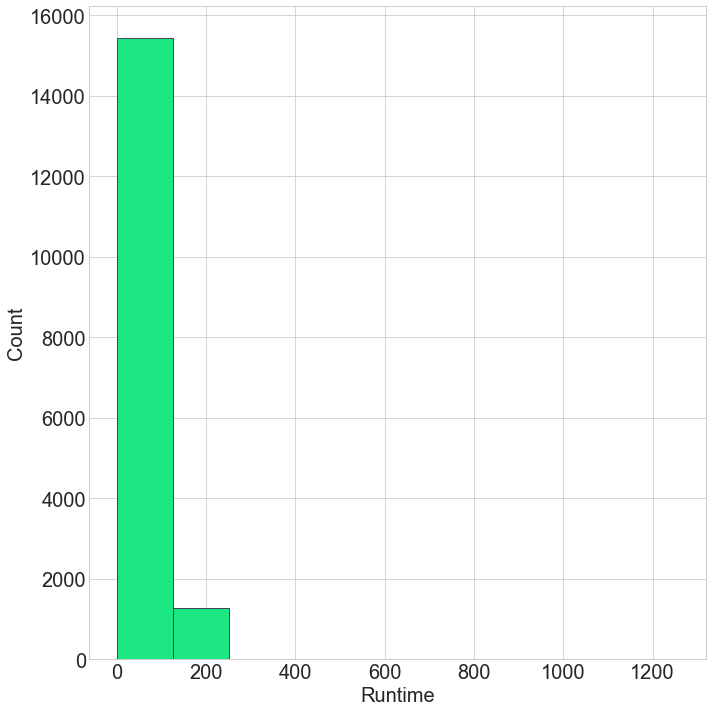

In [ ]:
plt.figure(figsize = (10,10))
plt.style.use('seaborn-whitegrid')
plt.hist(df.Runtime, color='#1ce783', edgecolor = '#445')
plt.xlabel('Runtime', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize= 20 )
plt.yticks(fontsize= 20 )
plt.tight_layout()
plt.show()

## Looking at the graph, there must be outliers. We will account for this later in the code. 

## Business Questions

### Question 1: Which genres were mostly highly rated in 2020?

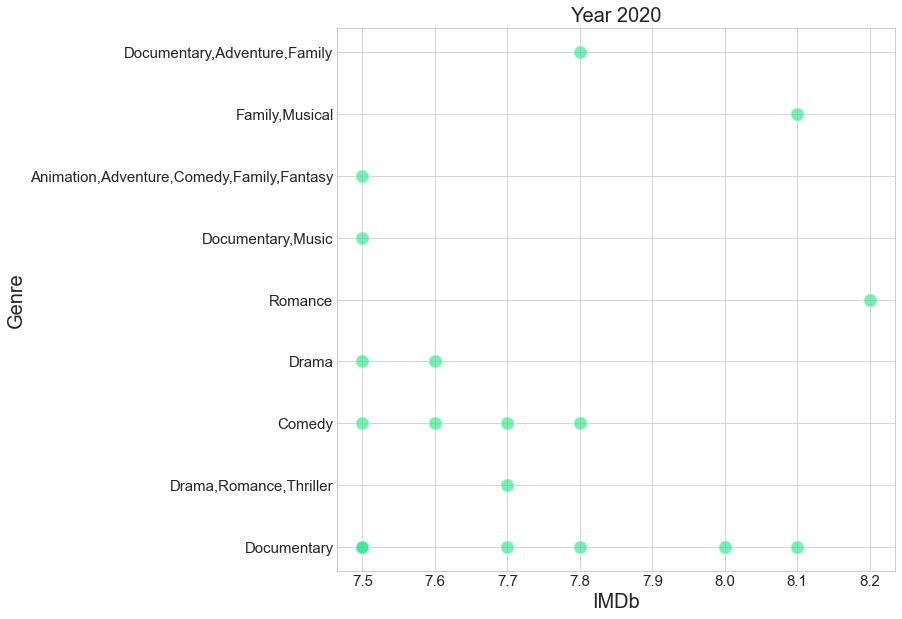

In [ ]:
plt.figure(figsize = (10,10))

Year2 = df[df.Year == 2020]
IMDbHigh = Year2[Year2.IMDb >=7.5]


plt.style.use('seaborn-whitegrid')
plt.scatter(
    x = IMDbHigh['IMDb'],
    y = IMDbHigh['Genres'],
    cmap = "Accent",
    alpha = 0.6,
    edgecolors = "white",
    linewidth = 2,
    s=200,
    color = '#1ce783');

plt.xlabel("IMDb", fontsize = 20)
plt.ylabel("Genre", fontsize = 20)
plt.title("Year 2020", fontsize = 20)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 )
plt.show()

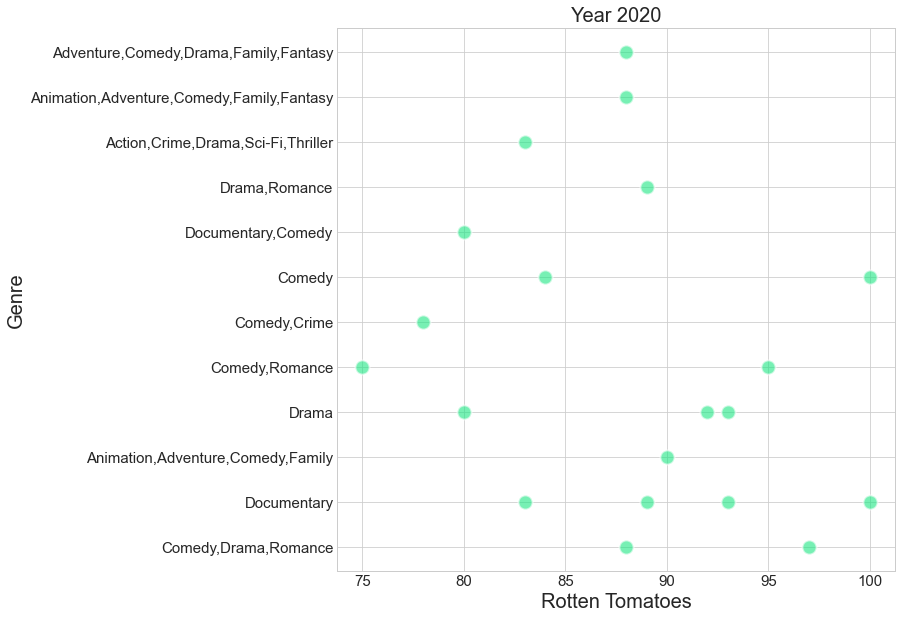

In [ ]:
plt.figure(figsize = (10,10))

Year2 = df[df.Year == 2020]
RottenHigh = Year2[Year2.RottenTomatoes >=75]


plt.style.use('seaborn-whitegrid')
plt.scatter(
    x = RottenHigh['RottenTomatoes'],
    y = RottenHigh['Genres'],
    cmap = "Accent",
    alpha = 0.6,
    edgecolors = "white",
    linewidth = 2,
    s=200,
    color = '#1ce783');

plt.xlabel("Rotten Tomatoes", fontsize = 20)
plt.ylabel("Genre", fontsize = 20)
plt.title("Year 2020", fontsize = 20)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 )
plt.show()

### Question 2: Which age groups have the highest number of highly rated movies?

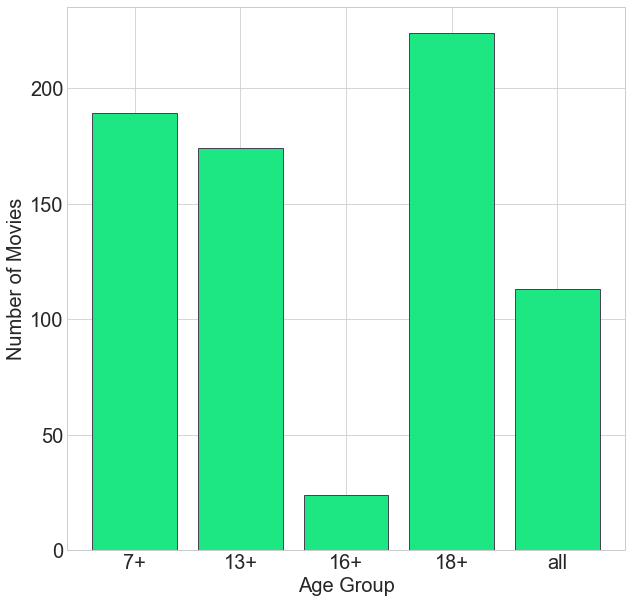

In [ ]:
imdb_age = {}

counter = 0
total7 = 0
total13 = 0
total16 = 0
total18 = 0
totalall = 0


for row in df["Age"]:
    if df["IMDb"][counter] >= 7.5: 
        if row == "7+":
            total7 = total7 + 1   
        if row == "13+":
            total13 = total13 + 1 
        if row == "16+":
            total16 = total16 + 1
        if row == "18+":
            total18 = total18 + 1
        if row == "all":
            totalall = totalall + 1
            
    counter = counter + 1

imdb_age["7+"] = total7
imdb_age["13+"] = total13
imdb_age["16+"] = total16
imdb_age["18+"] = total18
imdb_age["all"] = totalall

#print(imdb_age)

age_names = list(imdb_age.keys())
age_counts = list(imdb_age.values())

plt.figure(figsize = (10,10))
plt.style.use('seaborn-whitegrid')
plt.bar(range(len(imdb_age)), age_counts, tick_label = age_names, color='#1ce783', edgecolor = '#445')
plt.xlabel("Age Group", fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 20)
plt.xticks(fontsize= 20 )
plt.yticks(fontsize= 20 )
plt.show()



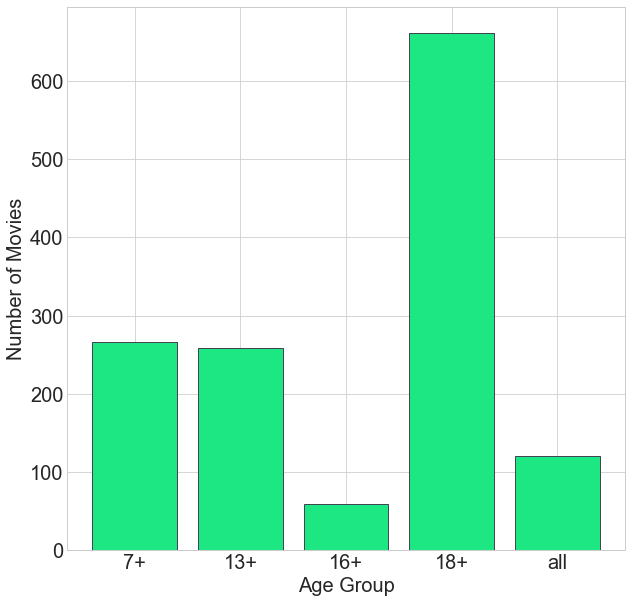

In [ ]:
rt_age = {}

counter = 0
total7 = 0
total13 = 0
total16 = 0
total18 = 0
totalall = 0


for row in df["Age"]:
    if df["RottenTomatoes"][counter] >= 75: 
        if row == "7+":
            total7 = total7 + 1   
        if row == "13+":
            total13 = total13 + 1 
        if row == "16+":
            total16 = total16 + 1
        if row == "18+":
            total18 = total18 + 1
        if row == "all":
            totalall = totalall + 1
            
    counter = counter + 1

    

rt_age["7+"] = total7
rt_age["13+"] = total13
rt_age["16+"] = total16
rt_age["18+"] = total18
rt_age["all"] = totalall

#print(imdb_age)



rtage_names = list(rt_age.keys())
rtage_counts = list(rt_age.values())

plt.figure(figsize = (10,10))
plt.style.use('seaborn-whitegrid')
plt.bar(range(len(rt_age)), rtage_counts, tick_label = rtage_names, color='#1ce783', edgecolor = '#445')
plt.xlabel("Age Group", fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 20)
plt.xticks(fontsize= 20 )
plt.yticks(fontsize= 20 )
plt.show()


### Question 3: Which years have the highest number of highly rated movies?

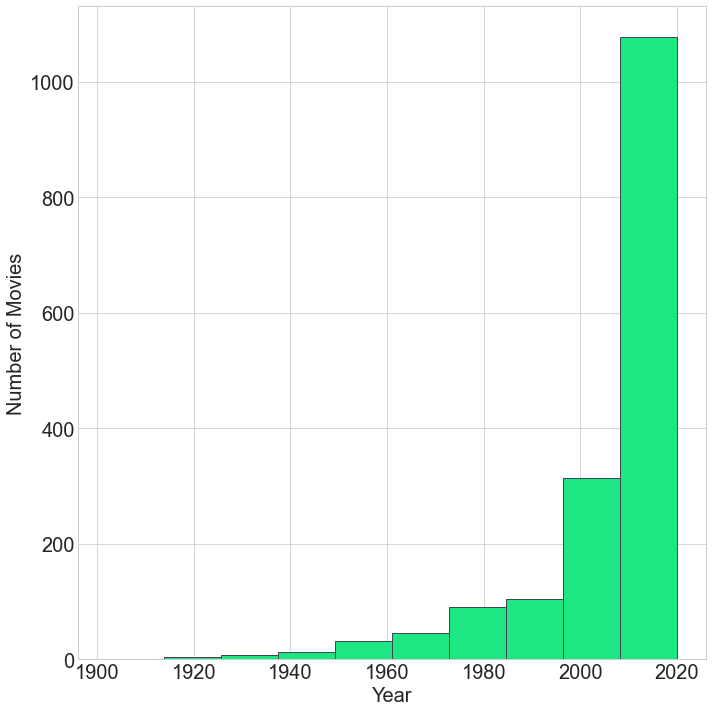

In [ ]:
#the chart for year IMDb

plt.figure(figsize = (10,10))
plt.style.use('seaborn-whitegrid')
IMDbHigh = df[df.IMDb >=7.5]  

plt.hist(IMDbHigh.Year, color='#1ce783', edgecolor = '#445')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Movies', fontsize = 20)
plt.xticks(fontsize= 20 )
plt.yticks(fontsize= 20 )
plt.tight_layout()
plt.show()


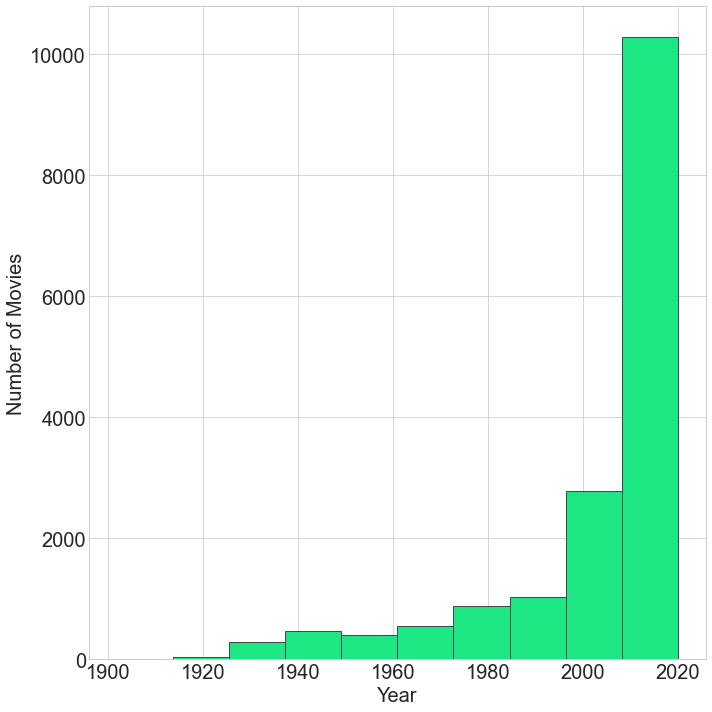

In [ ]:
#the chart for year Rotten Tomatoes

plt.figure(figsize = (10,10))

RottenHigh = df[df.RottenTomatoes >=7.5]

plt.hist(RottenHigh.Year, color='#1ce783', edgecolor = '#445')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Movies', fontsize = 20)
plt.xticks(fontsize= 20 )
plt.yticks(fontsize= 20 )
plt.tight_layout()
plt.show()


### Question 4: Which runtimes have the highest IMDb score?

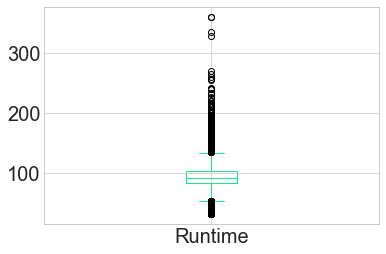

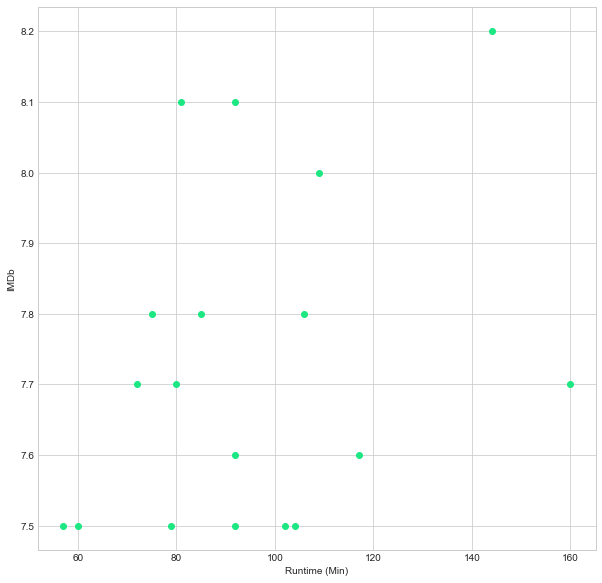

In [ ]:
#the boxplot of running time (w/o outliers)
dfn = df[(df['Runtime']<400)&(df['Runtime']>30)]
box = dfn.boxplot(column='Runtime',fontsize=20, color = "#1ce783" )
plt.figure(figsize = (10,10))


#the boxplot of running time (greater than 7.5 IMDb)
dfi = df[(df['IMDb']>=7.5)&(df['Year']==2020)]
plt.scatter (dfi.Runtime, dfi.IMDb, color = '#1ce783')

plt.xlabel("Runtime (Min)")
plt.ylabel("IMDb")
plt.show()


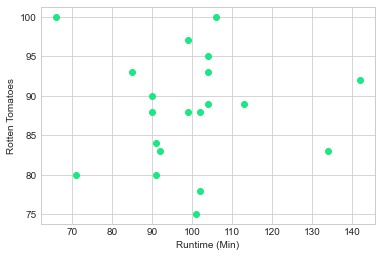

In [ ]:
#the boxplot of running time (greater than 75 Rotten Tomatoes)
dfr = df[(df['RottenTomatoes']>=75)&(df['Year']==2020)]
plt.scatter (dfr.Runtime, dfr.RottenTomatoes, color = '#1ce783')

plt.xlabel("Runtime (Min)")
plt.ylabel("Rotten Tomatoes")
plt.show()


### Combining Predictors 

In [ ]:
##making dummy variables for age group
ages = df['Age'].str.get_dummies(sep=',')
movies = pd.concat([df,ages,genres], axis = 1)
movies.loc[2]


Column1                                 2
ID                                      3
Title              Avengers: Infinity War
Year                                 2018
Age                                   13+
IMDb                                  8.5
RottenTomatoes                       84.0
Netflix                                 1
Hulu                                    0
Prime Video                             0
Disney+                                 0
Directors         Anthony Russo,Joe Russo
Genres            Action,Adventure,Sci-Fi
Country                     United States
Language                          English
Runtime                             149.0
13+                                     1
16+                                     0
18+                                     0
7+                                      0
Missing                                 0
all                                     0
Action                                  1
Adventure                         

[4.30883777 6.22665596 4.91347962 ... 5.82591294 6.22665596 5.82591294]
0.8851782565977189
[Text(697.5, 978.48, 'Horror <= 0.5\nmse = 1.743\nsamples = 12558\nvalue = 5.912'), Text(348.75, 761.0400000000001, 'Documentary <= 0.5\nmse = 1.503\nsamples = 10890\nvalue = 6.089'), Text(174.375, 543.6, 'Runtime <= 101.5\nmse = 1.439\nsamples = 8964\nvalue = 5.914'), Text(87.1875, 326.1600000000001, 'Action <= 0.5\nmse = 1.39\nsamples = 5943\nvalue = 5.715'), Text(43.59375, 108.72000000000003, 'mse = 1.251\nsamples = 4847\nvalue = 5.826'), Text(130.78125, 108.72000000000003, 'mse = 1.715\nsamples = 1096\nvalue = 5.226'), Text(261.5625, 326.1600000000001, 'Year <= 1993.5\nmse = 1.303\nsamples = 3021\nvalue = 6.305'), Text(217.96875, 108.72000000000003, 'mse = 0.793\nsamples = 530\nvalue = 6.673'), Text(305.15625, 108.72000000000003, 'mse = 1.376\nsamples = 2491\nvalue = 6.227'), Text(523.125, 543.6, 'Music <= 0.5\nmse = 0.999\nsamples = 1926\nvalue = 6.901'), Text(435.9375, 326.1600000000001, 'R

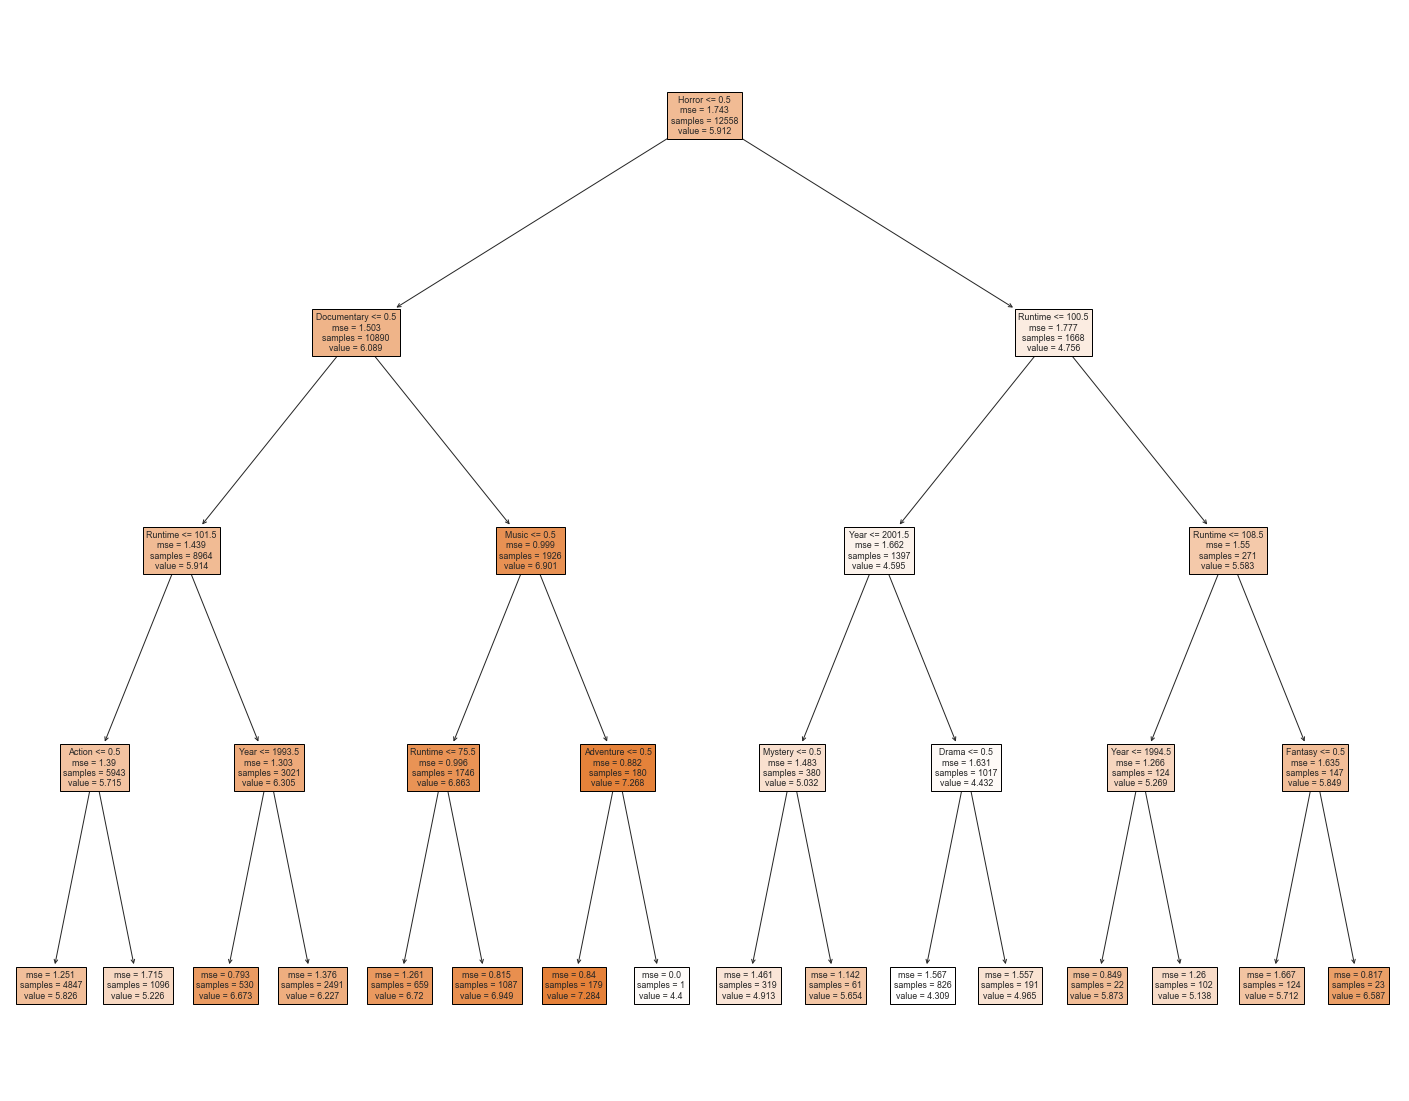

In [ ]:
#predicting high IMDb scores
movie_features = ["Runtime", "7+", "13+", "16+", "18+", "all","Year",'Action', 'Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror','Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
x = movies[movie_features]
y = movies.IMDb

#splitting into training and test datasets
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y = train_test_split(x,y,random_state = 0)

#training the model
from sklearn.tree import DecisionTreeRegressor
movie_model = DecisionTreeRegressor(max_depth = 4, random_state = 1)
movie_model.fit(train_x,train_y)

predicted_imdb = movie_model.predict(val_x)
print(predicted_imdb)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(val_y, predicted_imdb))

from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree_viz = tree.plot_tree(movie_model, feature_names = movie_features, filled = True)
print(tree_viz)


[63.27287762 63.27287762 63.27287762 ... 70.52309846 69.38848921
 63.27287762]
7.885954928957944
[Text(697.5, 978.48, 'Documentary <= 0.5\nmse = 228.557\nsamples = 12558\nvalue = 69.274'), Text(348.75, 761.0400000000001, '18+ <= 0.5\nmse = 242.929\nsamples = 10615\nvalue = 68.268'), Text(174.375, 543.6, '13+ <= 0.5\nmse = 194.582\nsamples = 8182\nvalue = 69.248'), Text(87.1875, 326.1600000000001, '7+ <= 0.5\nmse = 155.684\nsamples = 7373\nvalue = 70.04'), Text(43.59375, 108.72000000000003, 'mse = 125.345\nsamples = 6429\nvalue = 70.523'), Text(130.78125, 108.72000000000003, 'mse = 349.875\nsamples = 944\nvalue = 66.748'), Text(261.5625, 326.1600000000001, 'Runtime <= 123.5\nmse = 491.312\nsamples = 809\nvalue = 62.032'), Text(217.96875, 108.72000000000003, 'mse = 507.014\nsamples = 670\nvalue = 60.506'), Text(305.15625, 108.72000000000003, 'mse = 350.281\nsamples = 139\nvalue = 69.388'), Text(523.125, 543.6, 'Runtime <= 85.5\nmse = 391.421\nsamples = 2433\nvalue = 64.972'), Text(435.93

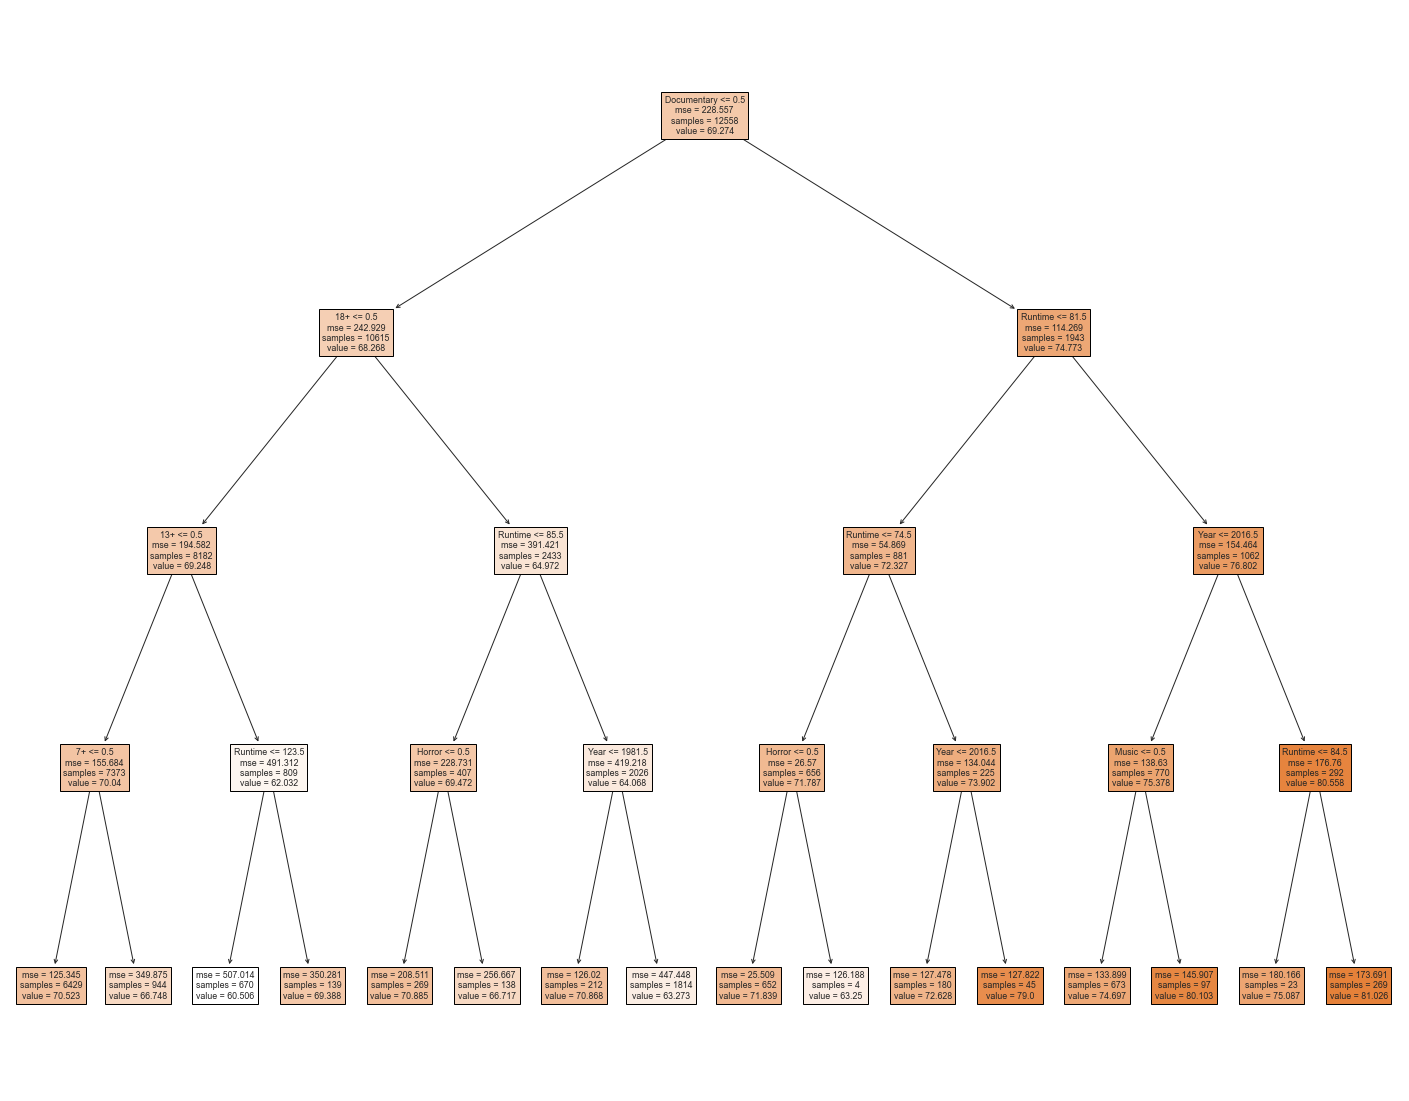

In [ ]:
# predicting high Rotten Tomatoes
movie_features = ["Runtime", "7+", "13+", "16+", "18+", "all","Year",'Action', 'Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror','Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
x = movies[movie_features]
y = movies.RottenTomatoes

train_x,val_x,train_y,val_y = train_test_split(x,y,random_state = 0)
movie_model2 = DecisionTreeRegressor(max_depth = 4, random_state = 1)
movie_model2.fit(train_x,train_y)
predicted_rt = movie_model2.predict(val_x)
print(predicted_rt)

print(mean_absolute_error(val_y, predicted_rt))



fig = plt.figure(figsize=(25,20))
tree_viz2 = tree.plot_tree(movie_model2, feature_names = movie_features, filled = True)
print(tree_viz2)


### Competitor Analysis

In [ ]:
total = 0
dictionary_ott = {}
list_ott = ['Netflix','Hulu','Prime Video','Disney+']

for kind in list_ott:
    total = 0
    for movie in df[kind]:
        if movie == 1:
            total = total + 1
    dictionary_ott[kind] = total
print(dictionary_ott)

{'Netflix': 3560, 'Hulu': 903, 'Prime Video': 12354, 'Disney+': 564}


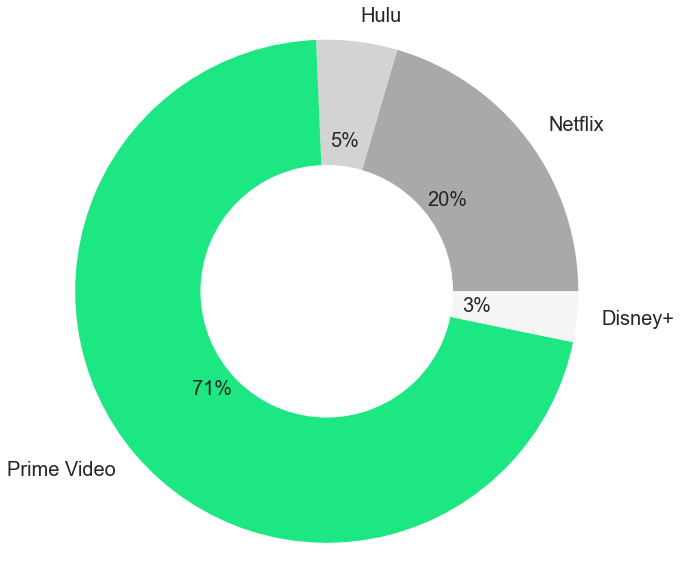

In [ ]:
labs = ['Netflix','Hulu','Prime Video','Disney+']
sizes = [3560,903,12354,564]
colors = ["darkgray", "lightgray", "#1ce783", "whitesmoke"]
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labs, colors=colors, autopct = '%.0f%%', textprops={'fontsize': 20})

my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.gcf().gca().add_artist(my_circle)

plt.axis('equal')
plt.show()

In [ ]:
#making lists of IMDb scores per streaming service
hulu_list = []
count = 0
for row in df["Hulu"]:
    if row == 1:
        hulu_list.append(df["IMDb"][count])
    count = count + 1

disney_list = []
count = 0
for row in df["Disney+"]:
    if row == 1:
        disney_list.append(df["IMDb"][count])
    count = count + 1
#print(disney_list)

prime_list = []
count = 0
for row in df["Prime Video"]:
    if row == 1:
        prime_list.append(df["IMDb"][count])
    count = count + 1
#print(prime_list)

netflix_list = []
count = 0
for row in df["Netflix"]:
    if row == 1:
        netflix_list.append(df["IMDb"][count])
    count = count + 1
#print(netflix_list)

In [ ]:
hulu_df = pd.DataFrame(hulu_list)
netflix_df = pd.DataFrame(netflix_list)
prime_df = pd.DataFrame(prime_list)
disney_df = pd.DataFrame(disney_list)

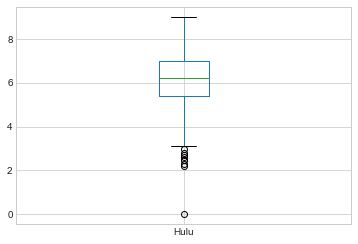

In [ ]:
hulu_df = hulu_df.rename(columns = {0:"Hulu"}, inplace = False)
hulu_box= hulu_df.boxplot(column = "Hulu")

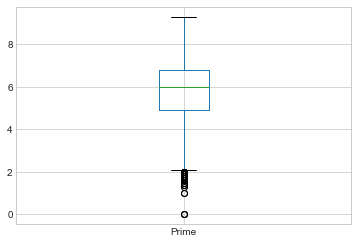

In [ ]:
prime_df = prime_df.rename(columns = {0:"Prime"}, inplace = False)
prime_box= prime_df.boxplot(column = "Prime")

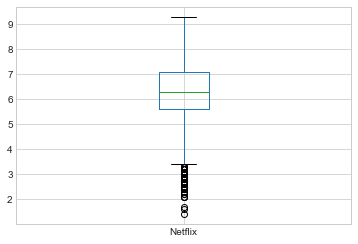

In [ ]:
netflix_df = netflix_df.rename(columns = {0:"Netflix"}, inplace = False)
netflix_box= netflix_df.boxplot(column = "Netflix")

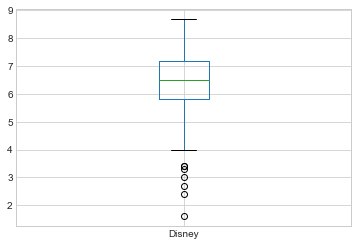

In [ ]:
disney_df = disney_df.rename(columns = {0:"Disney"}, inplace = False)
disney_box= disney_df.boxplot(column = "Disney")

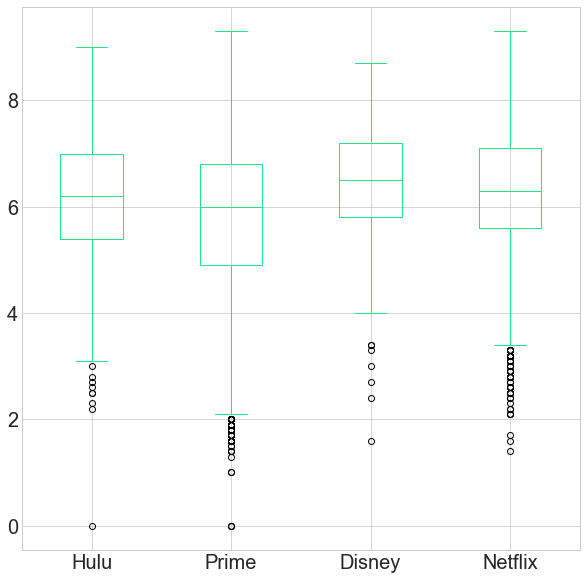

In [ ]:
plt.figure(figsize = (10,10))
big_dataframe = pd.concat([hulu_df, prime_df, netflix_df, disney_df])    
combined_box = big_dataframe.boxplot(column = ["Hulu", "Prime","Disney","Netflix"], fontsize = 20, color = "#1ce783" )


In [ ]:
hulu_list = []
count = 0
for row in df["Hulu"]:
    if row == 1:
        hulu_list.append(df["RottenTomatoes"][count])
    count = count + 1

from numpy import mean
    
avg = mean(hulu_list)
print("Average", round(avg,2))

Average 68.09


In [ ]:
disney_list = []
count = 0
for row in df["Disney+"]:
    if row == 1:
        disney_list.append(df["RottenTomatoes"][count])
    count = count + 1
    
avg1 = mean(disney_list)
print("Average", round(avg1,2))

Average 66.87


In [ ]:
prime_list = []
count = 0
for row in df["Prime Video"]:
    if row == 1:
        prime_list.append(df["RottenTomatoes"][count])
    count = count + 1
    
avg2 = mean(prime_list)
print("Average", round(avg2,2))

Average 69.34


In [ ]:
netflix_list = []
count = 0
for row in df["Netflix"]:
    if row == 1:
        netflix_list.append(df["RottenTomatoes"][count])
    count = count + 1
    
avg3 = mean(netflix_list)
print("Average", round(avg3,2))

Average 69.07


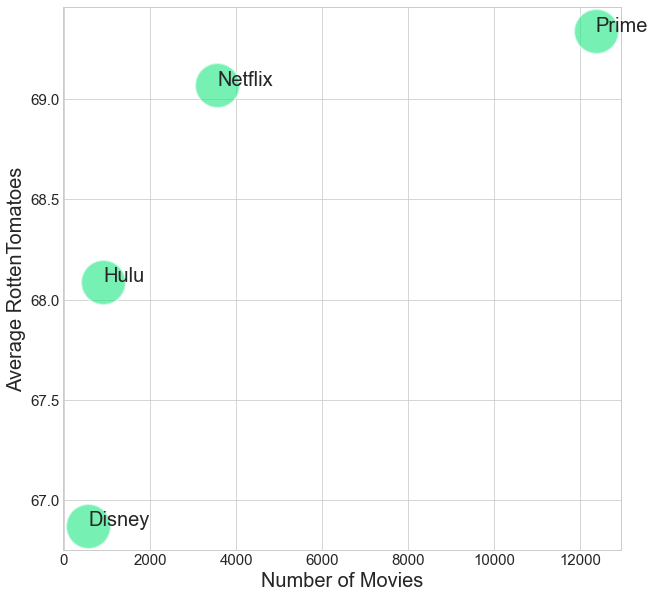

In [ ]:
num_movies = [3560, 903, 12354, 564 ]
num_rate = [69.07, 68.09, 69.34, 66.87]
num_names = ['Netflix', 'Hulu', 'Prime', 'Disney']

plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,10))
plt.scatter(num_movies, num_rate, color = "#1ce783", cmap = 'Accent', alpha = 0.6, edgecolors = 'white', linewidth = 2, s=2000 )

for i, txt in enumerate(num_names):
    plt.annotate(txt, (num_movies[i], num_rate[i]), size=20)
    
plt.xlabel("Number of Movies", fontsize = 20)
plt.ylabel("Average RottenTomatoes", fontsize = 20)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 )
plt.show()

In [ ]:
genres_new = genres.join(df)
genres_new.head(30)

### prime
prime_genres = {}
list2 = ['Action', 'Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror','Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
#genres list excludes "Missing" genre

for kind in list2:
    sum1 = 0
    total = 0
    counter = 0
    average = 0
    for movie in genres_new[kind]:
        if movie == 1:
            if genres_new["Prime Video"][counter] == 1:
                total = total + 1
                sum1 = sum1 + genres_new["IMDb"][counter]
        counter = counter + 1
    average = sum1 / total
    prime_genres[kind] = average

In [ ]:
hulu_genres = {}
list2 = ['Action', 'Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror','Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
#genres list excludes "Missing" genre

for kind in list2:
    sum1 = 0
    total = 0
    counter = 0
    average = 0
    for movie in genres_new[kind]:
        if movie == 1:
            if genres_new["Hulu"][counter] == 1:
                total = total + 1
                sum1 = sum1 + genres_new["IMDb"][counter]
        counter = counter + 1
    average = sum1 / total
    hulu_genres[kind] = average

In [ ]:
netflix_genres = {}
list3 = ['Action', 'Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror','Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
#genres list excludes "Missing" genre

for kind in list3:
    sum1 = 0
    total = 0
    counter = 0
    average = 0
    for movie in genres_new[kind]:
        if movie == 1:
            if genres_new["Netflix"][counter] == 1:
                total = total + 1
                sum1 = sum1 + genres_new["IMDb"][counter]
        counter = counter + 1
    average = sum1 / total
    netflix_genres[kind] = average
print(netflix_genres)


{'Action': 6.031559633027529, 'Adventure': 6.086792452830183, 'Animation': 6.325225225225226, 'Biography': 6.964321608040201, 'Comedy': 6.164602446483192, 'Crime': 6.195430107526882, 'Documentary': 6.9027397260273915, 'Drama': 6.346768820786147, 'Family': 6.079047619047617, 'Fantasy': 6.110465116279067, 'Film-Noir': 6.1, 'Game-Show': 5.1, 'History': 6.770454545454548, 'Horror': 5.540225563909769, 'Music': 6.718939393939399, 'Musical': 6.322368421052631, 'Mystery': 6.111904761904751, 'News': 7.099999999999999, 'Reality-TV': 5.814285714285714, 'Romance': 6.186025408348447, 'Sci-Fi': 5.938659793814428, 'Short': 6.3383838383838365, 'Sport': 6.553636363636369, 'Talk-Show': 6.12, 'Thriller': 5.935889570552149, 'War': 6.535632183908048, 'Western': 6.532}


In [ ]:
disney_genres = {}
list4 = ['Action', 'Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror','Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
#genres list excludes "Missing" genre

for kind in list4:
    sum1 = 0
    total = 0
    counter = 0
    average = 0
    for movie in genres_new[kind]:
        if movie == 1:
            if genres_new["Disney+"][counter] == 1:
                total = total + 1
                sum1 = sum1 + genres_new["IMDb"][counter]
        counter = counter + 1
    if total == 0:
        average = 0
        disney_genres[kind] = average
    else:
        average = sum1 / total
        disney_genres[kind] = average
print(disney_genres)


{'Action': 6.662500000000002, 'Adventure': 6.594573643410856, 'Animation': 6.67739726027397, 'Biography': 7.23888888888889, 'Comedy': 6.185765124555163, 'Crime': 6.079166666666666, 'Documentary': 6.868253968253967, 'Drama': 6.409259259259263, 'Family': 6.312093023255808, 'Fantasy': 6.525000000000002, 'Film-Noir': 0, 'Game-Show': 0, 'History': 7.168749999999999, 'Horror': 6.288888888888889, 'Music': 5.648484848484847, 'Musical': 6.436904761904761, 'Mystery': 6.595238095238095, 'News': 7.4, 'Reality-TV': 6.85, 'Romance': 6.075641025641024, 'Sci-Fi': 6.470454545454545, 'Short': 6.517391304347825, 'Sport': 6.356410256410257, 'Talk-Show': 0, 'Thriller': 6.2124999999999995, 'War': 5.9, 'Western': 6.3125}


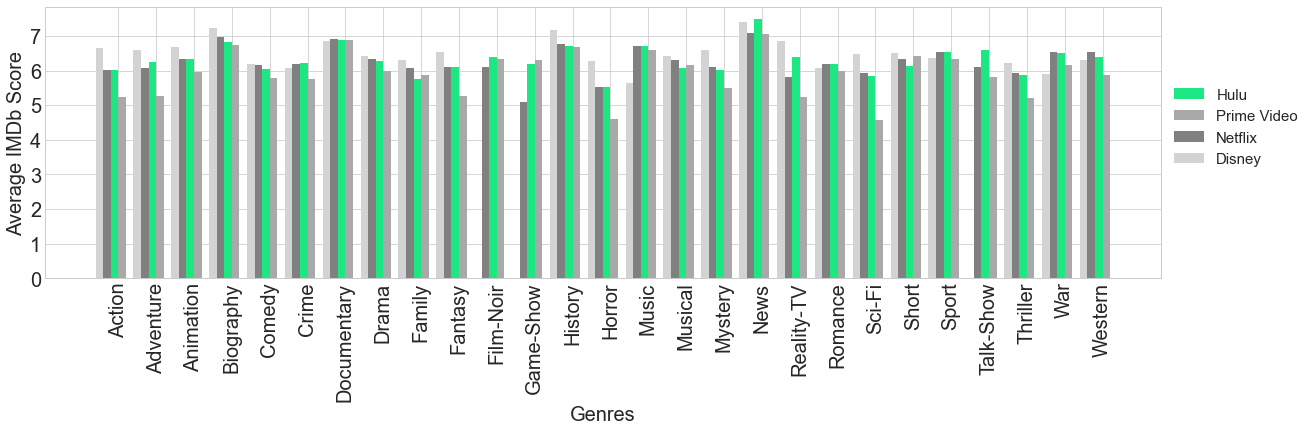

In [ ]:
hgenres_names = list(hulu_genres.keys())
hgenres_counts = list(hulu_genres.values())

pgenres_names = list(prime_genres.keys())
pgenres_counts = list(prime_genres.values())

ngenres_names = list(netflix_genres.keys())
ngenres_counts = list(netflix_genres.values())

dgenres_names = list(disney_genres.keys())
dgenres_counts = list(disney_genres.values())


x = np.arange(27)

plt.figure(figsize=(20,5))
plt.style.use('seaborn-whitegrid')
width = 0.2     

plt.bar(x, hgenres_counts, width, label ='Hulu', color = '#1ce783')
plt.bar(x + width, pgenres_counts, width, label ='Prime Video', color = "darkgray")
plt.bar(x - width, ngenres_counts, width, label ='Netflix', color = "gray")
plt.bar(x - 2*width, dgenres_counts, width, label ='Disney', color = "lightgray")



plt.xlabel('Genres', fontsize = 20)
plt.ylabel('Average IMDb Score', fontsize = 20)

plt.xticks(x + width / 2, ('Action', 'Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror','Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'), fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)

plt.legend(bbox_to_anchor=(1,0.75), fontsize = 15)
plt.show()


In [ ]:
## 2020 and combined IMDb, Rotten Tomatoes
titles3 = []
count = 0
for row in df["Title"]:
    if df["RottenTomatoes"][count] >= 75:
        if df["IMDb"][count] >= 7.5:
            if df["Year"][count] > 2018:
                title = df["Title"][count]
                titles3.append(df["Title"][count])
    count = count + 1

print(titles3)


['The Irishman', 'Marriage Story', 'Klaus', 'The Two Popes', 'I Lost My Body', 'The Boy Who Harnessed the Wind', 'Article 15', 'Bill Burr: Paper Tiger', 'Crip Camp: A Disability Revolution', 'Tell Me Who I Am', 'Last Breath', 'Woodstock: Three Days That Defined a Generation', 'Invader ZIM: Enter the Florpus', 'System Crasher', 'John Mulaney & The Sack Lunch Bunch', 'Rolling Thunder Revue: A Bob Dylan Story by Martin Scorsese', 'Aziz Ansari: Right Now', 'Parasite', 'Portrait of a Lady on Fire', 'How to Train Your Dragon: The Hidden World', 'Apollo 11', 'Honeyland', 'Minding the Gap', 'The Biggest Little Farm', 'Cold Case Hammarskj√∂ld', 'Raise Hell: The Life & Times of Molly Ivins', 'Scotch: A Golden Dream', 'Who Let the Dogs Out', 'The Lighthouse', 'The Farewell', 'For Sama', 'Invisible Life', 'One Child Nation', 'Spirits in the Forest', 'Jallikattu', 'Jim Gaffigan: Quality Time', 'Avengers: Endgame', 'Toy Story 4', 'Onward', 'Togo']


In [ ]:
titles = {}
count = 0
for row in df["Title"]:
    if df["IMDb"][count] >= 9:
        title = df["Title"][count]
        imdb_score = df["IMDb"][count]
        titles[title] = imdb_score
    count = count + 1

#print(titles)

sorted_dict_value_imdb = sorted(titles.items(), key = lambda sort_by:sort_by[1])
print(sorted_dict_value_imdb)


[('The Dark Knight', 9.0), ('Escape from Firebase Kate', 9.0), ('A Dog Named Gucci', 9.0), ('Natsamrat', 9.1), ('Finding Family', 9.1), ("Where's Daddy?", 9.1), ('My Next Guest with David Letterman and Shah Rukh Khan', 9.3), ('Love on a Leash', 9.3), ('Square One', 9.3), ('Steven Banks: Home Entertainment Center', 9.3), ('Down, But Not Out!', 9.3), ('Bounty', 9.3)]


In [ ]:
titles2 = {}
count = 0
for row in df["Title"]:
    if df["RottenTomatoes"][count] == 100:
        title = df["Title"][count]
        rt_score = df["RottenTomatoes"][count]
        titles2[title] = rt_score
    count = count + 1

print(titles2)


{'3 Idiots': 100.0, 'The Dawn Wall': 100.0, 'Bad Genius': 100.0, "Bill Burr: I'm Sorry You Feel That Way": 100.0, 'The Square': 100.0, 'Padman': 100.0, 'Virunga': 100.0, 'Kabhi Khushi Kabhie Gham': 100.0, 'Hannah Gadsby: Nanette': 100.0, 'Kapoor & Sons': 100.0, 'Sairat': 100.0, 'The Young Offenders': 100.0, "Everybody's Everything": 100.0, 'Kajaki': 100.0, 'The Distinguished Citizen': 100.0, 'Chasing Coral': 100.0, 'The White Helmets': 100.0, 'The Battered Bastards of Baseball': 100.0, 'For the Love of Spock': 100.0, 'John Mulaney: Kid Gorgeous at Radio City': 100.0, 'Crip Camp: A Disability Revolution': 100.0, 'Hey Arnold! The Jungle Movie': 100.0, 'Hamburger Hill': 100.0, 'Team Foxcatcher': 100.0, 'Creep 2': 100.0, 'Unrest': 100.0, 'Louis C.K. 2017': 100.0, 'Awe!': 100.0, 'Betting on Zero': 100.0, 'Cuba and the Cameraman': 100.0, 'Bobby Robson: More Than a Manager': 100.0, 'Us and Them': 100.0, 'Operation Odessa': 100.0, 'The American Meme': 100.0, 'The 24 Hour War': 100.0, 'The Devi

In [ ]:
## Hulu
hulu_age = {}

counter = 0
sum7 = 0
count7 = 0
sum13 = 0
count13 = 0
sum16 = 0
count16 = 0
sum18 = 0
count18 = 0
sumall = 0
countall = 0


for row in df["Age"]:
    if row == "7+":
        if df["Hulu"][counter] == 1: 
            count7 = count7 + 1
            sum7 = sum7 + df["IMDb"][counter]
    if row == "13+":
        if df["Hulu"][counter] == 1: 
            count13 = count13 + 1
            sum13 = sum13 + df["IMDb"][counter]
    if row == "16+":
        if df["Hulu"][counter] == 1: 
            count16 = count16 + 1
            sum16 = sum16 + df["IMDb"][counter]
    if row == "18+":
        if df["Hulu"][counter] == 1: 
            count18 = count18 + 1
            sum18 = sum18 + df["IMDb"][counter]
    if row == "all":
        if df["Hulu"][counter] == 1:
            countall = countall + 1
            sumall = sumall + df["IMDb"][counter]
    counter = counter + 1
avg13 = sum13 / count13
avg16 = sum16 / count16
avg18 = sum18 / count18
avg7 = sum7 / count7
avgall = sumall / countall

hulu_age["13+"] = avg13
hulu_age["16+"] = avg16
hulu_age["18+"] = avg18
hulu_age["7+"] = avg7
hulu_age["all"] = avgall

print(hulu_age)


{'13+': 6.427731092436976, '16+': 5.411764705882352, '18+': 6.175862068965516, '7+': 6.285321100917428, 'all': 5.920000000000002}


In [ ]:
## Netflix
netflix_age = {}

counter = 0
sum7 = 0
count7 = 0
sum13 = 0
count13 = 0
sum16 = 0
count16 = 0
sum18 = 0
count18 = 0
sumall = 0
countall = 0

for row in df["Age"]:
    if row == "7+":
        if df["Netflix"][counter] == 1: 
            count7 = count7 + 1
            sum7 = sum7 + df["IMDb"][counter]
    if row == "13+":
        if df["Netflix"][counter] == 1: 
            count13 = count13 + 1
            sum13 = sum13 + df["IMDb"][counter]
    if row == "16+":
        if df["Netflix"][counter] == 1: 
            count16 = count16 + 1
            sum16 = sum16 + df["IMDb"][counter]
    if row == "18+":
        if df["Netflix"][counter] == 1: 
            count18 = count18 + 1
            sum18 = sum18 + df["IMDb"][counter]
    if row == "all":
        if df["Netflix"][counter] == 1:
            countall = countall + 1
            sumall = sumall + df["IMDb"][counter]
    counter = counter + 1
avg13 = sum13 / count13
avg16 = sum16 / count16
avg18 = sum18 / count18
avg7 = sum7 / count7
avgall = sumall / countall

netflix_age["13+"] = avg13
netflix_age["16+"] = avg16
netflix_age["18+"] = avg18
netflix_age["7+"] = avg7
netflix_age["all"] = avgall

print(netflix_age)


{'13+': 6.344386422976498, '16+': 6.32359550561798, '18+': 6.289627659574461, '7+': 6.203095975232192, 'all': 6.276923076923075}


In [ ]:
disney_age = {}

counter = 0
sum7 = 0
count7 = 0
sum13 = 0
count13 = 0
sum16 = 0
count16 = 0
sum18 = 0
count18 = 0
sumall = 0
countall = 0

for row in df["Age"]:
    if row == "7+":
        if df["Disney+"][counter] == 1: 
            count7 = count7 + 1
            sum7 = sum7 + df["IMDb"][counter]
    if row == "13+":
        if df["Disney+"][counter] == 1: 
            count13 = count13 + 1
            sum13 = sum13 + df["IMDb"][counter]
    if row == "16+":
        if df["Disney+"][counter] == 1: 
            count16 = count16 + 1
            sum16 = sum16 + df["IMDb"][counter]
    if row == "18+":
        if df["Disney+"][counter] == 1: 
            count18 = count18 + 1
            sum18 = sum18 + df["IMDb"][counter]
    if row == "all":
        if df["Disney+"][counter] == 1:
            countall = countall + 1
            sumall = sumall + df["IMDb"][counter]
    counter = counter + 1
avg13 = sum13 / count13
avg16 = sum16 / count16
avg18 = sum18 / count18
avg7 = sum7 / count7
avgall = sumall / countall

disney_age["13+"] = avg13
disney_age["16+"] = avg16
disney_age["18+"] = avg18
disney_age["7+"] = avg7
disney_age["all"] = avgall

print(disney_age)


{'13+': 7.065, '16+': 4.8, '18+': 5.699999999999999, '7+': 6.435754189944138, 'all': 6.318411552346572}


In [ ]:
prime_age = {}

counter = 0
sum7 = 0
count7 = 0
sum13 = 0
count13 = 0
sum16 = 0
count16 = 0
sum18 = 0
count18 = 0
sumall = 0
countall = 0

for row in df["Age"]:
    if row == "7+":
        if df["Prime Video"][counter] == 1: 
            count7 = count7 + 1
            sum7 = sum7 + df["IMDb"][counter]
    if row == "13+":
        if df["Prime Video"][counter] == 1: 
            count13 = count13 + 1
            sum13 = sum13 + df["IMDb"][counter]
    if row == "16+":
        if df["Prime Video"][counter] == 1: 
            count16 = count16 + 1
            sum16 = sum16 + df["IMDb"][counter]
    if row == "18+":
        if df["Prime Video"][counter] == 1: 
            count18 = count18 + 1
            sum18 = sum18 + df["IMDb"][counter]
    if row == "all":
        if df["Prime Video"][counter] == 1:
            countall = countall + 1
            sumall = sumall + df["IMDb"][counter]
    counter = counter + 1
avg13 = sum13 / count13
avg16 = sum16 / count16
avg18 = sum18 / count18
avg7 = sum7 / count7
avgall = sumall / countall

prime_age["13+"] = avg13
prime_age["16+"] = avg16
prime_age["18+"] = avg18
prime_age["7+"] = avg7
prime_age["all"] = avgall

print(prime_age)


{'13+': 5.9622710622710615, '16+': 5.209292035398225, '18+': 5.384724349157748, '7+': 5.949344978165949, 'all': 6.073891625615759}


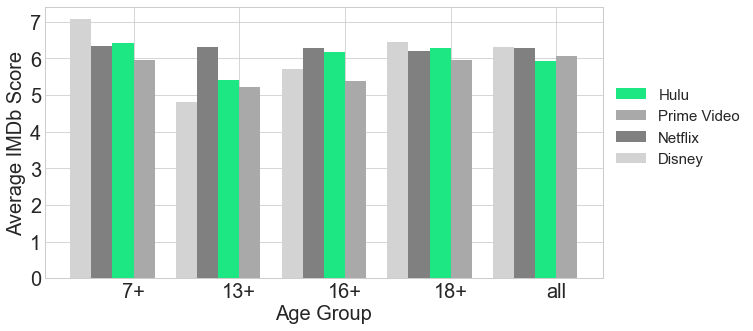

In [ ]:
## Combined bar chart

huluage_names = list(hulu_age.keys())
huluage_counts = list(hulu_age.values())

primeage_names = list(prime_age.keys())
primeage_counts = list(prime_age.values())

netflixage_names = list(netflix_age.keys())
netflixage_counts = list(netflix_age.values())

disneyage_names = list(disney_age.keys())
disneyage_counts = list(disney_age.values())

x = np.arange(5)

plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
width = 0.2     

plt.bar(x, huluage_counts, width, label ='Hulu', color = '#1ce783')
plt.bar(x + width, primeage_counts, width, label ='Prime Video', color = "darkgray")
plt.bar(x - width, netflixage_counts, width, label ='Netflix', color = "gray")
plt.bar(x - 2*width, disneyage_counts, width, label ='Disney', color = "lightgray")

plt.xlabel('Age Group', fontsize = 20)
plt.ylabel('Average IMDb Score', fontsize = 20)

plt.xticks(x + width / 2, ('7+', '13+','16+','18+','all'), fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend(bbox_to_anchor=(1,0.75), fontsize = 15)
plt.show()
